**Preprocessing Judol**

In [ ]:
import pandas as pd

data = pd.read_csv("tweets.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet_count  894 non-null    int64 
 1   Username     894 non-null    object
 2   Text         894 non-null    object
 3   Created At   894 non-null    object
 4   Retweets     894 non-null    int64 
 5   Likes        894 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 42.0+ KB


In [ ]:
import pandas as pd
from datetime import datetime

for index, row in data.iterrows():
  try:
    date_time_obj = datetime.strptime(row['Created At'], '%a %b %d %H:%M:%S %z %Y')
    data.at[index, 'tanggal'] = date_time_obj.strftime('%a-%b-%d')
    data.at[index, 'waktu'] = date_time_obj.strftime('%H:%M:%S')
  except ValueError:
    print(f"Done data berhasil di bagi : {row['Created At']}")

data.head(5)

,Tweet_count,Username,Text,Created At,Retweets,Likes,tanggal,waktu
0,1,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,Wed May 21 23:21:29 +0000 2025,3110,8816,Wed-May-21,23:21:29
1,2,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Thu May 22 03:44:30 +0000 2025,117,118,Thu-May-22,03:44:30
2,3,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Tue May 20 00:21:53 +0000 2025,11248,29895,Tue-May-20,00:21:53
3,4,jp,"Mari budayakan mirror service, kalo dicuekin y...",Wed May 14 01:14:13 +0000 2025,1400,3392,Wed-May-14,01:14:13
4,5,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Fri May 23 06:02:29 +0000 2025,170,981,Fri-May-23,06:02:29


In [ ]:
df = pd.DataFrame(data[['tanggal', 'waktu', 'Username', 'Text']])
df.head(15)

,tanggal,waktu,Username,Text
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ..."
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d..."
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y..."
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...
5,Fri-May-23,12:11:21,ryu,3 hal yg gw pengen skrg\n\n1. Wanteez comeback...
6,Fri-May-23,10:33:44,Nott,Nih orang selalu GACOR kalo acting dari dulu. ...
7,Wed-May-21,02:10:48,jp,jangan nyerah ya!🫶🏻 https://t.co/1aO2EDWRWc
8,Fri-May-23,12:13:06,keyshanabilla💋,Hai Keysha ready panggilan ya hari ini cuss ya...
9,Fri-May-23,11:14:47,kieelll 🫧,gw yakin mohan dan zara itu punya power buat l...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   894 non-null    object
 1   waktu     894 non-null    object
 2   Username  894 non-null    object
 3   Text      894 non-null    object
dtypes: object(4)
memory usage: 28.1+ KB


Menghapus Data Duplikat

In [ ]:
df.drop_duplicates(subset = 'Text', keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 893
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   892 non-null    object
 1   waktu     892 non-null    object
 2   Username  892 non-null    object
 3   Text      892 non-null    object
dtypes: object(4)
memory usage: 34.8+ KB


Proses World Cloud

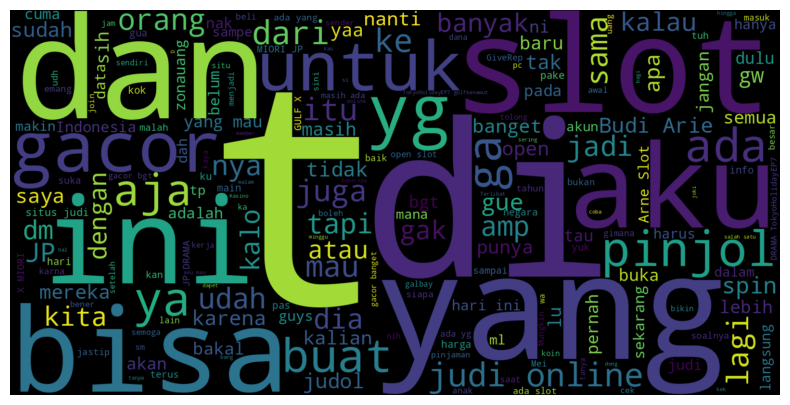

In [ ]:
import pandas as pd
import numpy as np
import PIL as image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df['Text'] = df['Text'].fillna('')

text = ' '.join(df['Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...' 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', width=1600, height=800)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

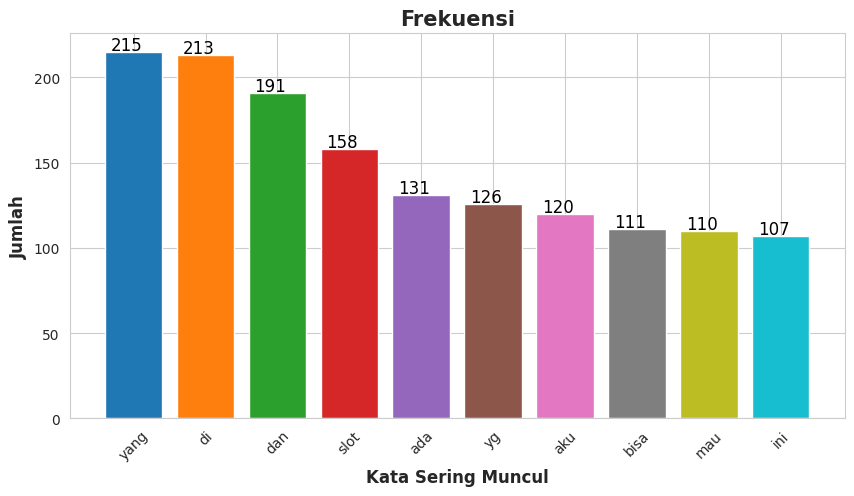

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(10, 5))
bars = plt.bar(word, count, color=colors)

plt.xlabel('Kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah', fontsize=12, fontweight='bold')
plt.title('Frekuensi', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1,str(num), fontsize=12, ha='center', color='black')

plt.show()

Proses Cleaning

In [ ]:
import re
import string
import nltk

def remove_URL(tweet):
  if tweet is not None and isinstance(tweet, str):
    url = re.compile(r'https?://\S+|ww\.\S+')
    return url.sub(r'', tweet)
  else:
    return tweet

def remove_html(tweet):
  if tweet is not None and isinstance(tweet, str):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)
  else:
    return tweet

def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # emoticon wajah
            u"\U0001F300-\U0001F5FF"  # simbol & pictograph
            u"\U0001F680-\U0001F6FF"  # transportasi & peta
            u"\U0001F1E0-\U0001F1FF"  # bendera
            u"\U00002500-\U00002BEF"  # simbol Tionghoa
            u"\U00002702-\U000027B0"  # simbol tambahan
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"                 # varian penampil
            u"\u3030"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
      return tweet

def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
  return tweet

def remove_numbers(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d', '', tweet)
  return tweet

def remove_username(text):
  import re
  return re.sub(r'@[^\s]+', '', text)

df['cleaning'] = df['Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x:remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x:remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x:remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x:remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x:remove_numbers(x))

df.head(5)

,tanggal,waktu,Username,Text,cleaning
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...


Proses Case Folding

In [ ]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,tanggal,waktu,Username,Text,cleaning,case_folding
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah,tolong banget ya allah
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalo dicuekin ya...
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...,nih sekalian min si perusahaan anjing jual d...


Normalisasi/ Normalization

In [ ]:
import pandas as pd

def replace_taboo_words(text, kamus_tidak_baku):
  if isinstance(text, str):
    words = text.split()
    replaced_words = []
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []

    for word in words:
      if word in kamus_tidak_baku:
        baku_word = kamus_tidak_baku[word]
        if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
          replaced_words.append(baku_word)
          kalimat_baku.append(baku_word)
          kata_diganti.append(word)
          kata_tidak_baku_hash.append(hash(word))
      else:
        replaced_words.append(word)
    replaced_text = ' '.join(replaced_words)
  else:
    replaced_text = ''
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []

  return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [ ]:
# Read Dataset

data = pd.DataFrame(df[['tanggal', 'waktu', 'Username', 'Text', 'cleaning', 'case_folding']])
data.head(5)

,tanggal,waktu,Username,Text,cleaning,case_folding
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah,tolong banget ya allah
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalo dicuekin ya...
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...,nih sekalian min si perusahaan anjing jual d...


Baca Kamus Kata tidak baku

In [ ]:
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
data['hasil_normalisasi'], data['Kalimat_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df = pd.DataFrame(data[['tanggal', 'waktu', 'Username', 'Text', 'cleaning', 'case_folding', 'hasil_normalisasi']])
df.head(5)

,tanggal,waktu,Username,Text,cleaning,case_folding,hasil_normalisasi
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah,tolong banget ya allah,tolong banget ya allah
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalau dicuekin y...
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...,nih sekalian min si perusahaan anjing jual d...,nih sekalian min sih perusahaan anjing jual da...


Tokenization / Tokenisasi

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenized'] = df['hasil_normalisasi'].apply(tokenize)
df.head(5)

,tanggal,waktu,Username,Text,cleaning,case_folding,hasil_normalisasi,tokenized
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah,tolong banget ya allah,tolong banget ya allah,"[tolong, banget, ya, allah]"
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,"[definisi, dompet, simpel, tapi, elegan, mana,..."
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,"[situs, pedulilindungidotid, yang, dulu, wajib..."
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalau dicuekin y...,"[mari, budayakan, mirror, service, kalau, dicu..."
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...,nih sekalian min si perusahaan anjing jual d...,nih sekalian min sih perusahaan anjing jual da...,"[nih, sekalian, min, sih, perusahaan, anjing, ..."


Proses Stopword Removal

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
df.head(5)

,tanggal,waktu,Username,Text,cleaning,case_folding,hasil_normalisasi,tokenized,stopword removal
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah,tolong banget ya allah,tolong banget ya allah,"[tolong, banget, ya, allah]","[tolong, banget, ya, allah]"
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,"[definisi, dompet, simpel, tapi, elegan, mana,...","[definisi, dompet, simpel, elegan, muat, cocok..."
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,"[situs, pedulilindungidotid, yang, dulu, wajib...","[situs, pedulilindungidotid, wajib, diinstal, ..."
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalau dicuekin y...,"[mari, budayakan, mirror, service, kalau, dicu...","[mari, budayakan, mirror, service, dicuekin, y..."
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...,nih sekalian min si perusahaan anjing jual d...,nih sekalian min sih perusahaan anjing jual da...,"[nih, sekalian, min, sih, perusahaan, anjing, ...","[nih, min, sih, perusahaan, anjing, jual, data..."


Proses Steaming Data

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
from functools import lru_cache

tqdm.pandas()

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming dengan caching
@lru_cache(maxsize=None)
def cached_stem(word):
    return stemmer.stem(word)

# Fungsi untuk list kata (bukan string)
def stem_text(word_list):
    return ' '.join(cached_stem(word) for word in word_list)

# Terapkan dengan progress bar
df['stemming_data'] = df['stopword removal'].progress_apply(stem_text)


100%|██████████| 892/892 [07:41<00:00,  1.93it/s]


In [ ]:
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [tanggal, waktu, Username, Text, cleaning, case_folding, hasil_normalisasi, tokenized, stopword removal, stemming_data]
Index: []


Hapus data non Value

In [ ]:
df.info()
print(df.isna().sum())
print(df[df.isna().any(axis=1)])
print(df[df['stemming_data'].isna()])


<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 893
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tanggal            892 non-null    object
 1   waktu              892 non-null    object
 2   Username           892 non-null    object
 3   Text               892 non-null    object
 4   cleaning           892 non-null    object
 5   case_folding       892 non-null    object
 6   hasil_normalisasi  892 non-null    object
 7   tokenized          892 non-null    object
 8   stopword removal   892 non-null    object
 9   stemming_data      892 non-null    object
dtypes: object(10)
memory usage: 108.9+ KB
tanggal              0
waktu                0
Username             0
Text                 0
cleaning             0
case_folding         0
hasil_normalisasi    0
tokenized            0
stopword removal     0
stemming_data        0
dtype: int64
Empty DataFrame
Columns: [tanggal, waktu, Username

In [ ]:
data = df.dropna()
df['stemming_data'] = df['stemming_data'].fillna('')
data.info()
df[df['stemming_data'].isnull()]

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 893
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tanggal            892 non-null    object
 1   waktu              892 non-null    object
 2   Username           892 non-null    object
 3   Text               892 non-null    object
 4   cleaning           892 non-null    object
 5   case_folding       892 non-null    object
 6   hasil_normalisasi  892 non-null    object
 7   tokenized          892 non-null    object
 8   stopword removal   892 non-null    object
 9   stemming_data      892 non-null    object
dtypes: object(10)
memory usage: 108.9+ KB


,tanggal,waktu,Username,Text,cleaning,case_folding,hasil_normalisasi,tokenized,stopword removal,stemming_data


WorldCloud After Preprocessing

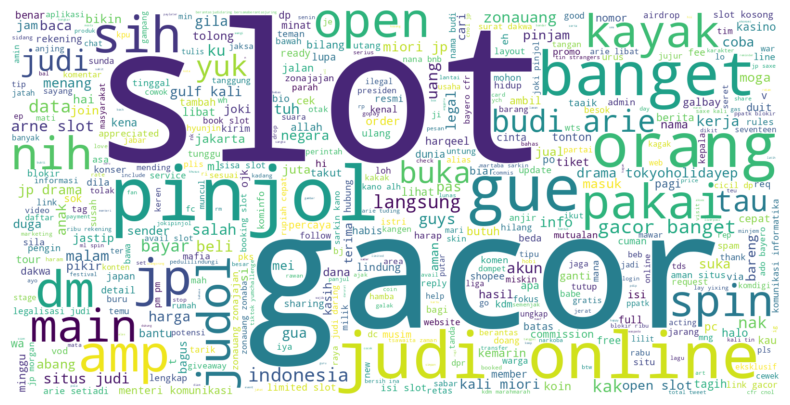

In [ ]:
import pandas as pd
import numpy as np
import PIL as image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = ' '.join(data['stemming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...' 'amp', 'lu', 'deh', 'fyp', 'ya'])

wc = WordCloud(stopwords=stopwords, background_color='white', max_words=500, width=1600, height=800)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

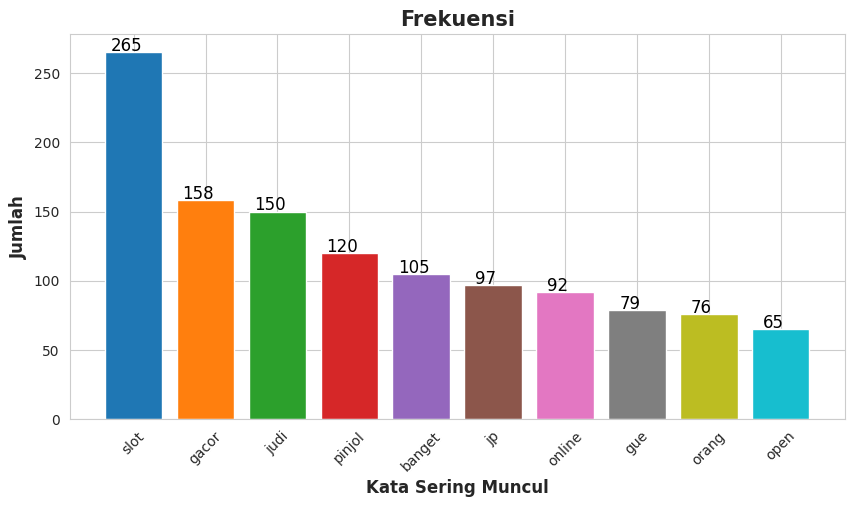

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(df["stemming_data"])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...' 'amp', 'lu', 'deh', 'fyp', 'ya'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(10, 5))
bars = plt.bar(word, count, color=colors)

plt.xlabel('Kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah', fontsize=12, fontweight='bold')
plt.title('Frekuensi', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1,str(num), fontsize=12, ha='center', color='black')

plt.show()

In [ ]:
data.to_csv("Preprocessing_Data.csv", encoding='utf8', index=False);

**Feature Extraction from Text: TF-IDF Vectorizer**

In [258]:
import re
import pandas as pd

# —————————————————————————————————————————————————————————
# 1) Fungsi preprocessing
df = pd.read_csv('Preprocessing_Data.csv')

# —————————————————————————————————————————————————————————
# 2) Daftar kata kunci & eksklusi & high-precision
raw_keywords = [
    'judi', 'judi online', 'judol', 'slot', 'casino', 'bet', 'jackpot', 'togel', 'taruhan',
    'poker', 'roulette', 'blackjack', 'baccarat', 'dominoqq', 'ceme', 'bandar', 'agen',
    'sbobet', 'bola tangkas', 'spin', 'payout', 'odds', 'live casino', 'rollingan',
    'kartu remi', 'chip', 'turnover', 'bookie', 'bookmaker', 'virtual bet', 'sic bo',
    'dadu', 'keno', 'scratch card', 'pachinko', 'martingale', 'parlay', 'over/under',
    'handicap', 'mix parlay', 'arbitrase', 'asian handicap', 'gamble', 'gambling',
    'all in', 'high roller', 'high limit', 'provably fair', 'cryptogambling',
    'bitcoin casino', 'satoshi dice', 'altcoin betting', 'staking', 'coinflip',
    'rakeback', 'refund bonus', 'cashback', 'freebet', 'rolling chip', 'top up',
    'saldo', 'balance', 'winrate', 'house edge', 'rtp', 'volatilitas',
    'random number generator', 'dealer', 'shuffle', 'tournament', 'sign up bonus',
    'reload bonus', 'referral bonus', 'vip program', 'loyalty points', 'comp points',
    'cash out', 'teaser', 'prop bet', 'futures', 'spread betting', 'moneyline',
    'exchange betting', 'push', 'juice', 'vig', 'whale', 'fish', 'shark', 'tilt',
    'bankroll management', 'staking plan', 'unit', 'kelly criterion', 'hot streak',
    'cold streak', 'edge', 'hole cards', 'flop', 'turn', 'river', 'showdown',
    'bluff', 'semi-bluff', 'check-raise', 'all-in', 'limp', 're-raise', 'three-bet',
    'four-bet', 'bubble', 'final table', 'bounty', 'deep stack', 'short stack',
    'ante', 'big blind', 'small blind', 'button', 'cutoff', 'hijack', 'under the gun',
    'pot odds', 'implied odds', 'fold equity', 'range', 'grinder', 'nit', 'lag',
    'tag', 'donk bet', 'continuation bet', 'blocker', 'runner-runner', 'bad beat',
    'jackpot situs', 'crash game', 'aviator', 'plinko', 'mines', 'limbo', 'dice',
    'hash', 'crash', 'hi-lo', 'kenoloto', 'powerball', 'megamillions', 'lotto',
    'numbers game', 'scratch-off', 'quick draw', 'pick 3', 'pick 4', 'cash4life',
    'lucky numbers'
]

raw_exclusions = [
    'bank', 'savings', 'tabungan', 'deposit bank', 'withdraw tabungan', 'pinjaman',
    'loan', 'kredit', 'investasi', 'asuransi', 'dana darurat', 'keuangan', 'financial',
    'rekening', 'account', 'transfer bank', 'mandiri', 'bca', 'bni', 'bri', 'btn',
    'paypal', 'gopay', 'ovo', 'dana', 'linkaja', 'shopeepay', 'financial planning',
    'laporan keuangan', 'anggaran', 'budgeting', 'currency', 'mata uang', 'forex',
    'saham', 'trading saham', 'reksadana', 'obligasi', 'crypto', 'bitcoin',
    'ethereum', 'blockchain', 'nft', 'metaverse', 'token', 'coinmarketcap', 'wallet',
    'dompet digital', 'fintech', 'uang elektronik', 'payment gateway', 'isi ulang',
    'pulsa', 'token listrik', 'bpjs', 'pajak', 'tax', 'insurance', 'premi', 'klaim',
    'jaminan', 'dana pensiun', 'buku tabungan', 'atm', 'ebanking', 'mobile banking',
    'kartu kredit'
]

raw_high_precision = [
    'judi online', 'main slot', 'ngeslot', 'jackpot situs', 'agen slot',
    'togel hari ini', 'judol', 'judi', 'slot', 'jackpot', 'casino'
]

def dedup(seq):
    return list(dict.fromkeys(seq))

judol_keywords   = dedup(raw_keywords)
judol_exclusions = dedup(raw_exclusions)
high_precision   = dedup(raw_high_precision)

# —————————————————————————————————————————————————————————
# 3) Compile satu regex besar per grup
big_kw_pattern = re.compile(
    r'\b(?:' + '|'.join(map(re.escape, judol_keywords)) + r')\b',
    re.IGNORECASE
)
big_exc_pattern = re.compile(
    r'\b(?:' + '|'.join(map(re.escape, judol_exclusions)) + r')\b',
    re.IGNORECASE
)
big_hp_pattern = re.compile(
    r'\b(?:' + '|'.join(map(re.escape, high_precision)) + r')\b',
    re.IGNORECASE
)

# —————————————————————————————————————————————————————————
# 4) Fungsi pelabelan refined
def label_judol_refined(text) -> int:
    if pd.isnull(text):
        return 0  # anggap teks kosong = bukan JUDOL
    text = str(text)  # konversi ke string kalau bukan
    if big_exc_pattern.search(text):
        return 0
    if big_hp_pattern.search(text):
        return 1
    hits = len(big_kw_pattern.findall(text))
    return 1 if hits >= 2 else 0



# —————————————————————————————————————————————————————————
# 5) Contoh penerapan ke DataFrame


df['label'] = df['stemming_data'].apply(label_judol_refined)
df['label_str'] = df['label'].map({0: 'Bukan JUDOL', 1: 'JUDOL'})
df.to_csv("Preprocessing_LabelingData.csv", encoding='utf8', index=False);
# 6) Tampilkan hasil
print(df[['Text', 'stemming_data', 'label_str']])

df.head(5)




                                                  Text  \
0    tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...   
1    Definisi dompet simpel tapi elegan, mana muat ...   
2    Situs Pedulilindungi[dot]id, yang dulu wajib d...   
3    Mari budayakan mirror service, kalo dicuekin y...   
4    @ojkindonesia Nih sekalian min @Telkomsel si p...   
..                                                 ...   
887  OPEN BOOKSLOT JASTIP TIKET\n2025 DOH KYUNG SOO...   
888  Nyesel bgt gua pas kita lagi sering pantatin b...   
889                           3SKM\n3 Slot Kas Members   
890  mutualan yuu, aku petani pemula mau nambah slo...   
891  📍RECEH88:Login Link Situs Slot Gacor Resmi dan...   

                                         stemming_data    label_str  
0                               tolong banget ya allah  Bukan JUDOL  
1    definisi dompet simpel elegan muat cocok kartu...  Bukan JUDOL  
2    situs pedulilindungidotid wajib diinstal warga...        JUDOL  
3    mari budaya mirror

,tanggal,waktu,Username,Text,cleaning,case_folding,hasil_normalisasi,tokenized,stopword removal,stemming_data,label,label_str
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah,tolong banget ya allah,tolong banget ya allah,"['tolong', 'banget', 'ya', 'allah']","['tolong', 'banget', 'ya', 'allah']",tolong banget ya allah,0,Bukan JUDOL
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,"['definisi', 'dompet', 'simpel', 'tapi', 'eleg...","['definisi', 'dompet', 'simpel', 'elegan', 'mu...",definisi dompet simpel elegan muat cocok kartu...,0,Bukan JUDOL
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,"['situs', 'pedulilindungidotid', 'yang', 'dulu...","['situs', 'pedulilindungidotid', 'wajib', 'dii...",situs pedulilindungidotid wajib diinstal warga...,1,JUDOL
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalau dicuekin y...,"['mari', 'budayakan', 'mirror', 'service', 'ka...","['mari', 'budayakan', 'mirror', 'service', 'di...",mari budaya mirror service dicuekin ya cuekin ...,0,Bukan JUDOL
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...,nih sekalian min si perusahaan anjing jual d...,nih sekalian min sih perusahaan anjing jual da...,"['nih', 'sekalian', 'min', 'sih', 'perusahaan'...","['nih', 'min', 'sih', 'perusahaan', 'anjing', ...",nih min sih usaha anjing jual data langgan jud...,1,JUDOL


In [259]:
# df['stemming_data'] = df['stemming_data'].fillna('Kosong')
df[df['stemming_data'].isnull()]
# print(df.isna().sum())
print(df[df['stemming_data'].isna()])

# print(df[df.isna().any(axis=1)])
# print(df[df['stemming_data'].isna()])


        tanggal     waktu Username                                Text  \
129  Wed-May-14  01:15:37       jp  pernah ga? https://t.co/WIoChsGNFr   

       cleaning case_folding hasil_normalisasi            tokenized  \
129  pernah ga    pernah ga       pernah tidak  ['pernah', 'tidak']   

    stopword removal stemming_data  label    label_str  
129               []           NaN      0  Bukan JUDOL  


In [260]:
df = df.dropna(subset=['stemming_data'])

In [261]:
# df['stemming_data'] = df['stemming_data'].fillna('Kosong')
df[df['stemming_data'].isnull()]
# print(df.isna().sum())
print(df[df['stemming_data'].isna()])

# print(df[df.isna().any(axis=1)])
# print(df[df['stemming_data'].isna()])


Empty DataFrame
Columns: [tanggal, waktu, Username, Text, cleaning, case_folding, hasil_normalisasi, tokenized, stopword removal, stemming_data, label, label_str]
Index: []


In [262]:
X = df[['stemming_data']]
y = df['label']
print(X.shape)
print(y.shape)

(891, 1)
(891,)


In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 1)
(268, 1)
(623,)
(268,)


In [264]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_df=0.5, min_df=2)

# Transformasi TF-IDF ke data training dan testing
tfidf_train = tfidf.fit_transform(X_train['stemming_data'])
tfidf_test = tfidf.transform(X_test['stemming_data'])

# Langsung pakai hasil TF-IDF (tanpa gabung kolom lain yang tidak tersedia)
X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

X_train_vect.head()


,0,1,2,3,4,5,6,7,8,9,...,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Visualize Confusion Matrix Vectorizer : TF-IDF**

In [265]:
print(df.columns)


Index(['tanggal', 'waktu', 'Username', 'Text', 'cleaning', 'case_folding',
       'hasil_normalisasi', 'tokenized', 'stopword removal', 'stemming_data',
       'label', 'label_str'],
      dtype='object')


In [266]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Naive Bayes

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       161
           1       0.88      0.85      0.86       107

    accuracy                           0.89       268
   macro avg       0.89      0.88      0.89       268
weighted avg       0.89      0.89      0.89       268



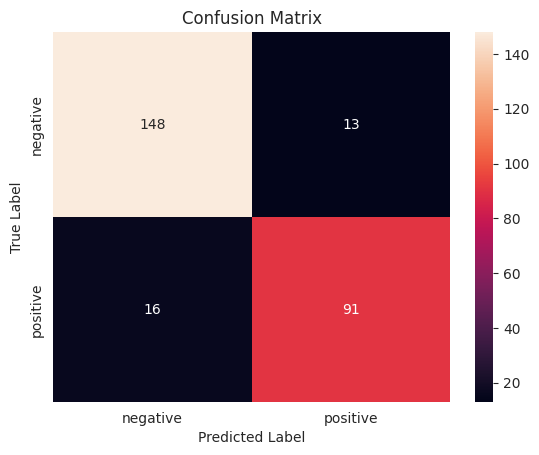

In [267]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
import seaborn as sns
sns.set_style("whitegrid")
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

SVM (Support Vector Machine)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       161
           1       0.91      0.97      0.94       107

    accuracy                           0.95       268
   macro avg       0.95      0.95      0.95       268
weighted avg       0.95      0.95      0.95       268



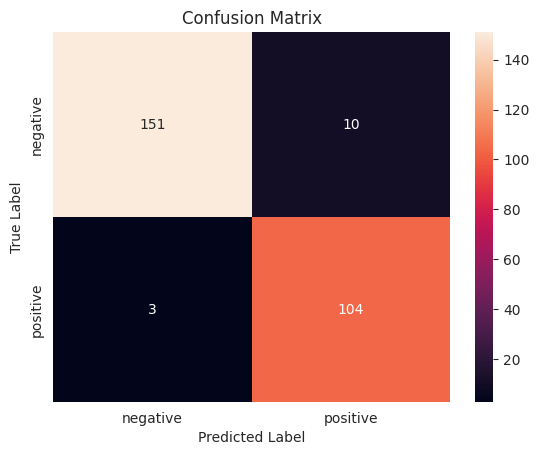

In [268]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0, probability=True)  # Tambahkan probability=True
classifier.fit(X_train_vect, y_train)

svm_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


KNN - K-Nearest Neighbor

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       161
           1       1.00      0.07      0.12       107

    accuracy                           0.63       268
   macro avg       0.81      0.53      0.44       268
weighted avg       0.77      0.63      0.51       268



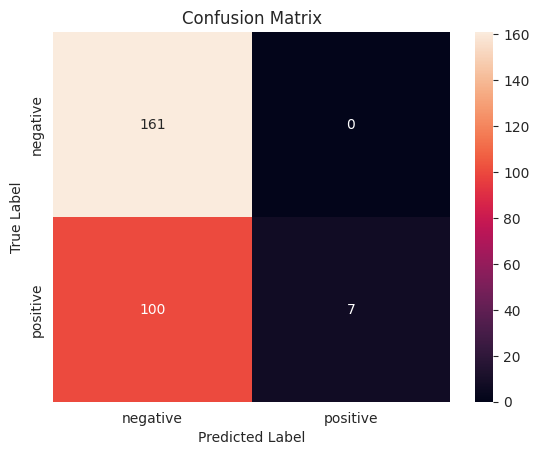

In [269]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K-Fold Cross Validation

In [270]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Custom scorers with zero_division handling
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

models = [
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel = 'linear'),
]
names = ["Naive Bayes", "KNN", "SVM"]

for model, name in zip(models, names):
    print("="*40)
    print(f"Model: {name}")
    scores = cross_validate(model, X_train_vect, y_train, scoring=scoring, cv=10)

    for metric in scoring.keys():
        print(f" {metric} - {scores['test_' + metric].mean():.4f}")

    # Insight tambahan
    print("\n📌 Insight:")
    if name == "Naive Bayes":
        print("- Naive Bayes bekerja cukup baik pada data ini dengan akurasi dan presisi tinggi.")
        print("- Model ini cocok untuk teks karena mengandalkan probabilitas distribusi kata.")
    elif name == "KNN":
        print("- KNN memberikan performa rendah terutama pada precision dan recall.")
        print("- Ini bisa terjadi karena KNN tidak cocok untuk representasi data TF-IDF berdimensi tinggi.")
        print("- Alternatif: coba kurangi dimensi (misal dengan PCA) atau gunakan model lain seperti SVM/LogReg.")
    elif name == "SVM":
        print("- SVM memberikan performa terbaik di antara model yang diuji.")
        print("- Presisi dan recall tinggi, cocok untuk deteksi konten JUDOL yang butuh akurasi ketat.")
        print("- Model ini robust terhadap data sparse seperti TF-IDF.")
    print("\n")


Model: Naive Bayes
 accuracy - 0.8875
 precision - 0.9166
 recall - 0.7890
 f1 - 0.8470

📌 Insight:
- Naive Bayes bekerja cukup baik pada data ini dengan akurasi dan presisi tinggi.
- Model ini cocok untuk teks karena mengandalkan probabilitas distribusi kata.


Model: KNN
 accuracy - 0.6019
 precision - 0.1000
 recall - 0.0040
 f1 - 0.0077

📌 Insight:
- KNN memberikan performa rendah terutama pada precision dan recall.
- Ini bisa terjadi karena KNN tidak cocok untuk representasi data TF-IDF berdimensi tinggi.
- Alternatif: coba kurangi dimensi (misal dengan PCA) atau gunakan model lain seperti SVM/LogReg.


Model: SVM
 accuracy - 0.9373
 precision - 0.9484
 recall - 0.8908
 f1 - 0.9185

📌 Insight:
- SVM memberikan performa terbaik di antara model yang diuji.
- Presisi dan recall tinggi, cocok untuk deteksi konten JUDOL yang butuh akurasi ketat.
- Model ini robust terhadap data sparse seperti TF-IDF.




Predictions

*   Vectorizer : CountVectorizer (Bag of words)
*   Algoritma : Multinomial Naive Bayes

In [271]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['stemming_data']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [272]:
# SVM Classifier
from sklearn.svm import LinearSVC
clfa = LinearSVC()

# Training
clfa.fit(X_train_cv, y_train_cv)

# Evaluasi skor akurasi
print("Accuracy:", clfa.score(X_test_cv, y_test_cv))


Accuracy: 0.9888059701492538


In [273]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.914179104477612

In [274]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN, misalnya dengan 5 tetangga
knn = KNeighborsClassifier(n_neighbors=5)

# Training model
knn.fit(X_train_cv, y_train_cv)

# Evaluasi akurasi
accuracy = knn.score(X_test_cv, y_test_cv)
print("Akurasi KNN:", accuracy)


Akurasi KNN: 0.6902985074626866


In [275]:
print(df.columns)


Index(['tanggal', 'waktu', 'Username', 'Text', 'cleaning', 'case_folding',
       'hasil_normalisasi', 'tokenized', 'stopword removal', 'stemming_data',
       'label', 'label_str'],
      dtype='object')


In [276]:
data = [
    "Situs ini penipu, saya kalah terus!",
    "Dapet jackpot besar dari slot, mantap!",
    "Tidak bisa withdraw, sangat buruk.",
    "Deposit lancar, menang juga gampang.",
    "Ini judi online ilegal, hati-hati.",
    "CS sangat ramah dan cepat tanggap.",
    "Saya kecanduan main slot tiap malam.",
    "Waktu withdraw terlalu lama, kecewa.",
    'Main judi online tiap malam, susah berhenti!',
    'Deposit lancar, withdraw cepat, jackpot melimpah, ngeslot',
    'Mau pinjam uang untuk beli pulsa',
    'Bet you’ll love this game!',
    'Togel hari ini keluar ngeslot angkanya'
]

# Vektorisasi
vect = cv.transform(data)

# ==== MODEL 1: clf ====
print("\n=== Prediksi dengan Model Naive Bayes / Model 1 ===")
pred_naivebayes = clf.predict(vect.toarray())
for text, pred in zip(data, pred_naivebayes):
    print(f"Teks: {text} ➜ Prediksi Sentimen: {pred}")

# ==== MODEL 2: clfa ====
print("\n=== Prediksi dengan Model SVM / Model 2 ===")
pred_svm = clfa.predict(vect)
for text, pred in zip(data, pred_svm):
    print(f"Teks: {text} ➜ Prediksi Sentimen: {pred}")

# ==== MODEL 3: knn (K-Nearest Neighbors) ====
print("\n=== Prediksi dengan Model KNN / Model 3 ===")
pred_knn = knn.predict(vect)
for text, pred in zip(data, pred_knn):
    print(f"Teks: {text} ➜ Prediksi Sentimen: {pred}")



=== Prediksi dengan Model Naive Bayes / Model 1 ===
Teks: Situs ini penipu, saya kalah terus! ➜ Prediksi Sentimen: 1
Teks: Dapet jackpot besar dari slot, mantap! ➜ Prediksi Sentimen: 1
Teks: Tidak bisa withdraw, sangat buruk. ➜ Prediksi Sentimen: 0
Teks: Deposit lancar, menang juga gampang. ➜ Prediksi Sentimen: 0
Teks: Ini judi online ilegal, hati-hati. ➜ Prediksi Sentimen: 1
Teks: CS sangat ramah dan cepat tanggap. ➜ Prediksi Sentimen: 0
Teks: Saya kecanduan main slot tiap malam. ➜ Prediksi Sentimen: 1
Teks: Waktu withdraw terlalu lama, kecewa. ➜ Prediksi Sentimen: 0
Teks: Main judi online tiap malam, susah berhenti! ➜ Prediksi Sentimen: 1
Teks: Deposit lancar, withdraw cepat, jackpot melimpah, ngeslot ➜ Prediksi Sentimen: 0
Teks: Mau pinjam uang untuk beli pulsa ➜ Prediksi Sentimen: 0
Teks: Bet you’ll love this game! ➜ Prediksi Sentimen: 0
Teks: Togel hari ini keluar ngeslot angkanya ➜ Prediksi Sentimen: 1

=== Prediksi dengan Model SVM / Model 2 ===
Teks: Situs ini penipu, saya kal

In [277]:
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# TF-IDF dan model training
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['stemming_data'])  # atau kolom yang kamu pakai
y = df['label']

model = MultinomialNB()
model.fit(X_tfidf, y)

# Simpan vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Simpan model
joblib.dump(model, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']

In [278]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Load data
df = pd.read_csv('Preprocessing_LabelingData.csv')
df = df.dropna(subset=['stemming_data'])  # Pastikan tidak ada NaN

# TF-IDF dan model training
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['stemming_data'])  # Kolom hasil preprocessing
y = df['label']

# Gunakan SVM alih-alih Naive Bayes
model = LinearSVC()
model.fit(X_tfidf, y)

# Simpan vectorizer dan model SVM
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'svm_model.pkl')


['svm_model.pkl']

In [279]:
import joblib
import pandas as pd

# Load vectorizer dan model SVM yang sudah disimpan
tfidf = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('svm_model.pkl')  # Ganti dari 'naive_bayes_model.pkl' ke 'svm_model.pkl'

# Load data dan pastikan kolom preprocessing ada
df = pd.read_csv('Preprocessing_Data.csv')
df = df.dropna(subset=['stemming_data'])

# Ambil teks dari kolom stemming
texts = df['stemming_data'].tolist()

# Transform dan prediksi
X = tfidf.transform(texts)
predictions = model.predict(X)

# Simpan prediksi ke dataframe
df['prediksi'] = predictions

# Tampilkan hasil
df.head(15)


,tanggal,waktu,Username,Text,cleaning,case_folding,hasil_normalisasi,tokenized,stopword removal,stemming_data,prediksi
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah,tolong banget ya allah,tolong banget ya allah,"['tolong', 'banget', 'ya', 'allah']","['tolong', 'banget', 'ya', 'allah']",tolong banget ya allah,0
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,"['definisi', 'dompet', 'simpel', 'tapi', 'eleg...","['definisi', 'dompet', 'simpel', 'elegan', 'mu...",definisi dompet simpel elegan muat cocok kartu...,0
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,"['situs', 'pedulilindungidotid', 'yang', 'dulu...","['situs', 'pedulilindungidotid', 'wajib', 'dii...",situs pedulilindungidotid wajib diinstal warga...,1
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalau dicuekin y...,"['mari', 'budayakan', 'mirror', 'service', 'ka...","['mari', 'budayakan', 'mirror', 'service', 'di...",mari budaya mirror service dicuekin ya cuekin ...,0
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...,nih sekalian min si perusahaan anjing jual d...,nih sekalian min sih perusahaan anjing jual da...,"['nih', 'sekalian', 'min', 'sih', 'perusahaan'...","['nih', 'min', 'sih', 'perusahaan', 'anjing', ...",nih min sih usaha anjing jual data langgan jud...,1
5,Fri-May-23,12:11:21,ryu,3 hal yg gw pengen skrg\n\n1. Wanteez comeback...,hal yg gw pengen skrg\n\n Wanteez comeback\n ...,hal yg gw pengen skrg\n\n wanteez comeback\n ...,hal yang gue pengin sekarang wanteez comeback ...,"['hal', 'yang', 'gue', 'pengin', 'sekarang', '...","['gue', 'pengin', 'wanteez', 'comeback', 'atee...",gue pengin wanteez comeback ateez comeback asi...,0
6,Fri-May-23,10:33:44,Nott,Nih orang selalu GACOR kalo acting dari dulu. ...,Nih orang selalu GACOR kalo acting dari dulu T...,nih orang selalu gacor kalo acting dari dulu t...,nih orang selalu gacor kalau acting dari dulu ...,"['nih', 'orang', 'selalu', 'gacor', 'kalau', '...","['nih', 'orang', 'gacor', 'acting', 'totalitas...",nih orang gacor acting totalitas banget anjir ...,0
7,Wed-May-21,02:10:48,jp,jangan nyerah ya!🫶🏻 https://t.co/1aO2EDWRWc,jangan nyerah ya,jangan nyerah ya,jangan nyerah ya,"['jangan', 'nyerah', 'ya']","['nyerah', 'ya']",nyerah ya,0
8,Fri-May-23,12:13:06,keyshanabilla💋,Hai Keysha ready panggilan ya hari ini cuss ya...,Hai Keysha ready panggilan ya hari ini cuss ya...,hai keysha ready panggilan ya hari ini cuss ya...,hai keysha ready panggilan ya hari ini cuss ya...,"['hai', 'keysha', 'ready', 'panggilan', 'ya', ...","['hai', 'keysha', 'ready', 'panggilan', 'ya', ...",hai keysha ready panggil ya cuss isi slot dada...,1
9,Fri-May-23,11:14:47,kieelll 🫧,gw yakin mohan dan zara itu punya power buat l...,gw yakin mohan dan zara itu punya power buat l...,gw yakin mohan dan zara itu punya power buat l...,gue yakin mohan dan zara itu punya power buat ...,"['gue', 'yakin', 'mohan', 'dan', 'zara', 'itu'...","['gue', 'mohan', 'zara', 'power', 'lawan', 'or...",gue mohan zara power lawan ormis ya disatuin l...,0


In [280]:
# Load model dan vectorizer terpisah
tfidf = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('naive_bayes_model.pkl')

# Ambil kolom yang sudah dipreprocessing
texts = df['stemming_data'].tolist()

# Transform dan prediksi
X = tfidf.transform(texts)
predictions = model.predict(X)

# Gabung hasil ke dataframe
df['prediksi'] = predictions
df.head(15)


,tanggal,waktu,Username,Text,cleaning,case_folding,hasil_normalisasi,tokenized,stopword removal,stemming_data,prediksi
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah,tolong banget ya allah,tolong banget ya allah,"['tolong', 'banget', 'ya', 'allah']","['tolong', 'banget', 'ya', 'allah']",tolong banget ya allah,0
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,"['definisi', 'dompet', 'simpel', 'tapi', 'eleg...","['definisi', 'dompet', 'simpel', 'elegan', 'mu...",definisi dompet simpel elegan muat cocok kartu...,0
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,"['situs', 'pedulilindungidotid', 'yang', 'dulu...","['situs', 'pedulilindungidotid', 'wajib', 'dii...",situs pedulilindungidotid wajib diinstal warga...,1
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalau dicuekin y...,"['mari', 'budayakan', 'mirror', 'service', 'ka...","['mari', 'budayakan', 'mirror', 'service', 'di...",mari budaya mirror service dicuekin ya cuekin ...,0
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...,nih sekalian min si perusahaan anjing jual d...,nih sekalian min sih perusahaan anjing jual da...,"['nih', 'sekalian', 'min', 'sih', 'perusahaan'...","['nih', 'min', 'sih', 'perusahaan', 'anjing', ...",nih min sih usaha anjing jual data langgan jud...,0
5,Fri-May-23,12:11:21,ryu,3 hal yg gw pengen skrg\n\n1. Wanteez comeback...,hal yg gw pengen skrg\n\n Wanteez comeback\n ...,hal yg gw pengen skrg\n\n wanteez comeback\n ...,hal yang gue pengin sekarang wanteez comeback ...,"['hal', 'yang', 'gue', 'pengin', 'sekarang', '...","['gue', 'pengin', 'wanteez', 'comeback', 'atee...",gue pengin wanteez comeback ateez comeback asi...,0
6,Fri-May-23,10:33:44,Nott,Nih orang selalu GACOR kalo acting dari dulu. ...,Nih orang selalu GACOR kalo acting dari dulu T...,nih orang selalu gacor kalo acting dari dulu t...,nih orang selalu gacor kalau acting dari dulu ...,"['nih', 'orang', 'selalu', 'gacor', 'kalau', '...","['nih', 'orang', 'gacor', 'acting', 'totalitas...",nih orang gacor acting totalitas banget anjir ...,0
7,Wed-May-21,02:10:48,jp,jangan nyerah ya!🫶🏻 https://t.co/1aO2EDWRWc,jangan nyerah ya,jangan nyerah ya,jangan nyerah ya,"['jangan', 'nyerah', 'ya']","['nyerah', 'ya']",nyerah ya,0
8,Fri-May-23,12:13:06,keyshanabilla💋,Hai Keysha ready panggilan ya hari ini cuss ya...,Hai Keysha ready panggilan ya hari ini cuss ya...,hai keysha ready panggilan ya hari ini cuss ya...,hai keysha ready panggilan ya hari ini cuss ya...,"['hai', 'keysha', 'ready', 'panggilan', 'ya', ...","['hai', 'keysha', 'ready', 'panggilan', 'ya', ...",hai keysha ready panggil ya cuss isi slot dada...,1
9,Fri-May-23,11:14:47,kieelll 🫧,gw yakin mohan dan zara itu punya power buat l...,gw yakin mohan dan zara itu punya power buat l...,gw yakin mohan dan zara itu punya power buat l...,gue yakin mohan dan zara itu punya power buat ...,"['gue', 'yakin', 'mohan', 'dan', 'zara', 'itu'...","['gue', 'mohan', 'zara', 'power', 'lawan', 'or...",gue mohan zara power lawan ormis ya disatuin l...,0


In [281]:
import pandas as pd
import joblib

# 1. Load vectorizer dan model
tfidf_loaded = joblib.load('tfidf_vectorizer.pkl')
model_loaded = joblib.load('naive_bayes_model.pkl')

# 2. Load dan siapkan data dari Preprocessing_Data.csv
df = pd.read_csv('Preprocessing_Data.csv')
df = df.dropna(subset=['stemming_data'])  # Pastikan tidak ada NaN

# 3. Ambil teks yang sudah diproses
data = df['stemming_data'].tolist()

# 4. Ubah ke format TF-IDF
data_tfidf = tfidf_loaded.transform(data)

# 5. Prediksi
prediksi = model_loaded.predict(data_tfidf)

# 6. Simpan hasil prediksi ke kolom baru
df['prediksi'] = prediksi

# 7. Tampilkan hasil
print(df[['stemming_data', 'prediksi']].head(10))
df.head(10)


                                       stemming_data  prediksi
0                             tolong banget ya allah         0
1  definisi dompet simpel elegan muat cocok kartu...         0
2  situs pedulilindungidotid wajib diinstal warga...         1
3  mari budaya mirror service dicuekin ya cuekin ...         0
4  nih min sih usaha anjing jual data langgan jud...         0
5  gue pengin wanteez comeback ateez comeback asi...         0
6  nih orang gacor acting totalitas banget anjir ...         0
7                                          nyerah ya         0
8  hai keysha ready panggil ya cuss isi slot dada...         1
9  gue mohan zara power lawan ormis ya disatuin l...         0


,tanggal,waktu,Username,Text,cleaning,case_folding,hasil_normalisasi,tokenized,stopword removal,stemming_data,prediksi
0,Wed-May-21,23:21:29,jp,tolong banget ya Allah 😭🤲🏻 https://t.co/8O7KQO...,tolong banget ya Allah,tolong banget ya allah,tolong banget ya allah,"['tolong', 'banget', 'ya', 'allah']","['tolong', 'banget', 'ya', 'allah']",tolong banget ya allah,0
1,Thu-May-22,03:44:30,Mountain⛰,"Definisi dompet simpel tapi elegan, mana muat ...",Definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,definisi dompet simpel tapi elegan mana muat b...,"['definisi', 'dompet', 'simpel', 'tapi', 'eleg...","['definisi', 'dompet', 'simpel', 'elegan', 'mu...",definisi dompet simpel elegan muat cocok kartu...,0
2,Tue-May-20,00:21:53,herwin,"Situs Pedulilindungi[dot]id, yang dulu wajib d...",Situs Pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,situs pedulilindungidotid yang dulu wajib diin...,"['situs', 'pedulilindungidotid', 'yang', 'dulu...","['situs', 'pedulilindungidotid', 'wajib', 'dii...",situs pedulilindungidotid wajib diinstal warga...,1
3,Wed-May-14,01:14:13,jp,"Mari budayakan mirror service, kalo dicuekin y...",Mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalo dicuekin ya...,mari budayakan mirror service kalau dicuekin y...,"['mari', 'budayakan', 'mirror', 'service', 'ka...","['mari', 'budayakan', 'mirror', 'service', 'di...",mari budaya mirror service dicuekin ya cuekin ...,0
4,Fri-May-23,06:02:29,Kecambah,@ojkindonesia Nih sekalian min @Telkomsel si p...,Nih sekalian min si perusahaan anjing jual d...,nih sekalian min si perusahaan anjing jual d...,nih sekalian min sih perusahaan anjing jual da...,"['nih', 'sekalian', 'min', 'sih', 'perusahaan'...","['nih', 'min', 'sih', 'perusahaan', 'anjing', ...",nih min sih usaha anjing jual data langgan jud...,0
5,Fri-May-23,12:11:21,ryu,3 hal yg gw pengen skrg\n\n1. Wanteez comeback...,hal yg gw pengen skrg\n\n Wanteez comeback\n ...,hal yg gw pengen skrg\n\n wanteez comeback\n ...,hal yang gue pengin sekarang wanteez comeback ...,"['hal', 'yang', 'gue', 'pengin', 'sekarang', '...","['gue', 'pengin', 'wanteez', 'comeback', 'atee...",gue pengin wanteez comeback ateez comeback asi...,0
6,Fri-May-23,10:33:44,Nott,Nih orang selalu GACOR kalo acting dari dulu. ...,Nih orang selalu GACOR kalo acting dari dulu T...,nih orang selalu gacor kalo acting dari dulu t...,nih orang selalu gacor kalau acting dari dulu ...,"['nih', 'orang', 'selalu', 'gacor', 'kalau', '...","['nih', 'orang', 'gacor', 'acting', 'totalitas...",nih orang gacor acting totalitas banget anjir ...,0
7,Wed-May-21,02:10:48,jp,jangan nyerah ya!🫶🏻 https://t.co/1aO2EDWRWc,jangan nyerah ya,jangan nyerah ya,jangan nyerah ya,"['jangan', 'nyerah', 'ya']","['nyerah', 'ya']",nyerah ya,0
8,Fri-May-23,12:13:06,keyshanabilla💋,Hai Keysha ready panggilan ya hari ini cuss ya...,Hai Keysha ready panggilan ya hari ini cuss ya...,hai keysha ready panggilan ya hari ini cuss ya...,hai keysha ready panggilan ya hari ini cuss ya...,"['hai', 'keysha', 'ready', 'panggilan', 'ya', ...","['hai', 'keysha', 'ready', 'panggilan', 'ya', ...",hai keysha ready panggil ya cuss isi slot dada...,1
9,Fri-May-23,11:14:47,kieelll 🫧,gw yakin mohan dan zara itu punya power buat l...,gw yakin mohan dan zara itu punya power buat l...,gw yakin mohan dan zara itu punya power buat l...,gue yakin mohan dan zara itu punya power buat ...,"['gue', 'yakin', 'mohan', 'dan', 'zara', 'itu'...","['gue', 'mohan', 'zara', 'power', 'lawan', 'or...",gue mohan zara power lawan ormis ya disatuin l...,0


In [282]:
# Load vectorizer dan model
tfidf_loaded = joblib.load('tfidf_vectorizer.pkl')
model_loaded = joblib.load('naive_bayes_model.pkl')

# Contoh prediksi
data = ["judi ", "Withdraw susah banget"]
data_tfidf = tfidf_loaded.transform(data)
prediksi = model_loaded.predict(data_tfidf)
print(prediksi)


[1 0]


In [283]:
# Load vectorizer dan model
tfidf_loaded = joblib.load('tfidf_vectorizer.pkl')
model_loaded = joblib.load('svm_model.pkl')

# Contoh prediksi
data = ["dia slot lagi", "Withdraw judi susah banget"]
data_tfidf = tfidf_loaded.transform(data)
prediksi = model_loaded.predict(data_tfidf)
print(prediksi)


[1 1]


In [284]:
import joblib

# 1. Load vectorizer dan dua model
tfidf = joblib.load('tfidf_vectorizer.pkl')
nb_model = joblib.load('naive_bayes_model.pkl')
svm_model = joblib.load('svm_model.pkl')

# 2. Data uji
data = [
    "Situs ini penipu, saya kalah terus!",
    "Dapet jackpot besar dari slot, mantap!",
    "Tidak bisa withdraw, sangat buruk.",
    "Deposit lancar, menang juga gampang.",
    "Ini judi online ilegal, hati-hati.",
    "CS sangat ramah dan cepat tanggap.",
    "Saya kecanduan main slot tiap malam.",
    "Waktu withdraw terlalu lama, kecewa.",
    'Main judi online tiap malam, susah berhenti!',
    'Deposit lancar, withdraw cepat, jackpot melimpah, ngeslot',
    'Mau pinjam uang untuk beli pulsa',
    'Bet you’ll love this game!',
    'Togel hari ini keluar ngeslot angkanya'
]

# 3. Transform ke bentuk TF-IDF
data_tfidf = tfidf.transform(data)

# 4. Prediksi dengan dua model
nb_pred = nb_model.predict(data_tfidf)
svm_pred = svm_model.predict(data_tfidf)

# 5. Tampilkan hasil prediksi
print("🔍 Hasil Prediksi:\n")
for text, nb, svm in zip(data, nb_pred, svm_pred):
    print(f"Teks: {text}")
    print(f"  ➤ Naive Bayes: {nb}")
    print(f"  ➤ SVM        : {svm}")
    print("-" * 60)


🔍 Hasil Prediksi:

Teks: Situs ini penipu, saya kalah terus!
  ➤ Naive Bayes: 1
  ➤ SVM        : 1
------------------------------------------------------------
Teks: Dapet jackpot besar dari slot, mantap!
  ➤ Naive Bayes: 0
  ➤ SVM        : 1
------------------------------------------------------------
Teks: Tidak bisa withdraw, sangat buruk.
  ➤ Naive Bayes: 0
  ➤ SVM        : 0
------------------------------------------------------------
Teks: Deposit lancar, menang juga gampang.
  ➤ Naive Bayes: 0
  ➤ SVM        : 0
------------------------------------------------------------
Teks: Ini judi online ilegal, hati-hati.
  ➤ Naive Bayes: 1
  ➤ SVM        : 1
------------------------------------------------------------
Teks: CS sangat ramah dan cepat tanggap.
  ➤ Naive Bayes: 0
  ➤ SVM        : 0
------------------------------------------------------------
Teks: Saya kecanduan main slot tiap malam.
  ➤ Naive Bayes: 1
  ➤ SVM        : 1
-----------------------------------------------------

In [285]:
print(tfidf.get_feature_names_out())

['aa' 'aaaaa' 'aaaaaa' ... 'zone' 'zuer' 'zulkarnaen']
